In [1]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
import pandas as pd
from sklearn.metrics import r2_score
from keras import backend as K
from platypus import SMPSO, Problem, Real, NSGAII, MOEAD
import pickle
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from sklearn.ensemble import RandomForestRegressor


In [4]:
from problem import RentSale
import visualization 


In [5]:
rent_model = pickle.load(open('../model_creation/outputs/rent_models/randforest_search.pkl', 'rb'))
sale_model = pickle.load(open('../model_creation/outputs/sale_models/randforest_search.pkl', 'rb'))

In [37]:
problem = RentSale(rent_model, sale_model)

algorithm = SMPSO(problem, log_frequency=100)
algorithm.run(5000)

In [38]:
print(algorithm.result[0])
print(algorithm.result[0].objectives)

Solution[574.1764966986543,2.0421601367748483,1.2910329914410381,13336.595855480842,19901.403857832665|-1812.7131428571429,49300.0|0]
[-1812.7131428571429, 49300.0]


In [39]:
objectives = [list(row.objectives) for row in algorithm.result]
parameters = [list(row.variables) for row in algorithm.result]

In [40]:
objectives = pd.DataFrame(objectives, columns=['rental', 'sale'])
objectives['rental'] = -1*objectives['rental']
objectives['TBE']=objectives['sale']/objectives['rental']
parameters = pd.DataFrame(parameters, columns=['sqfeet','beds','baths','income','density'])
parameters['beds'] = parameters['beds'].astype(int)
parameters['baths'] = parameters['baths'].astype(int)

In [41]:
optimized_data = pd.concat([parameters, objectives], axis=1)

In [42]:
optimized_data

,sqfeet,beds,baths,income,density,rental,sale,TBE
0,574.176497,2,1,13336.595855,19901.403858,1812.713143,49300.000000,27.196802
1,919.422405,2,1,129153.100341,65315.108535,3891.380000,993589.409938,255.330862
2,938.621704,3,1,128661.838215,79808.865573,3784.232000,770262.407768,203.545239
3,1590.833152,1,2,20638.012258,17942.975225,3727.932000,344514.945000,92.414493
4,681.300047,1,1,11368.000000,19487.110432,2040.971905,86846.000000,42.551296
5,853.125425,2,1,11368.000000,18674.092732,2543.343587,129177.500000,50.790424
6,1035.557724,2,1,16360.120169,19426.113493,2477.564000,90380.048333,36.479400
7,719.919088,2,1,15716.724201,39808.709149,2991.336000,129783.900850,43.386601
8,1911.376732,1,2,17073.814002,18514.492700,3417.210000,300649.835000,87.981083
9,1747.735770,1,1,18081.243188,19107.814843,3619.862000,332433.895000,91.836069


(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:xlabel='Rent price', ylabel='Sale price'>)

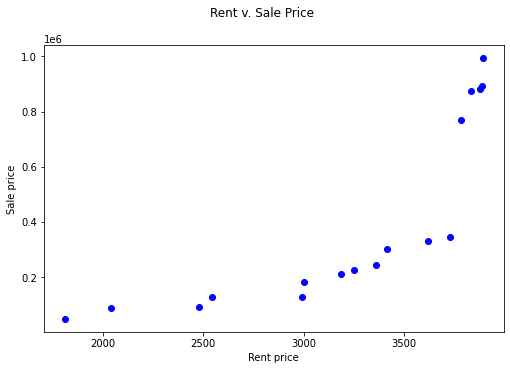

In [43]:
visualization.plot_pareto_front(optimized_data, "Rent v. Sale Price")

(<Figure size 1800x720 with 10 Axes>,
 array([[<AxesSubplot:xlabel='sqfeet', ylabel='beds'>,
         <AxesSubplot:xlabel='sqfeet', ylabel='income'>,
         <AxesSubplot:xlabel='beds', ylabel='baths'>,
         <AxesSubplot:xlabel='beds', ylabel='density'>,
         <AxesSubplot:xlabel='baths', ylabel='density'>],
        [<AxesSubplot:xlabel='sqfeet', ylabel='baths'>,
         <AxesSubplot:xlabel='sqfeet', ylabel='density'>,
         <AxesSubplot:xlabel='beds', ylabel='income'>,
         <AxesSubplot:xlabel='baths', ylabel='income'>,
         <AxesSubplot:xlabel='income', ylabel='density'>]], dtype=object))

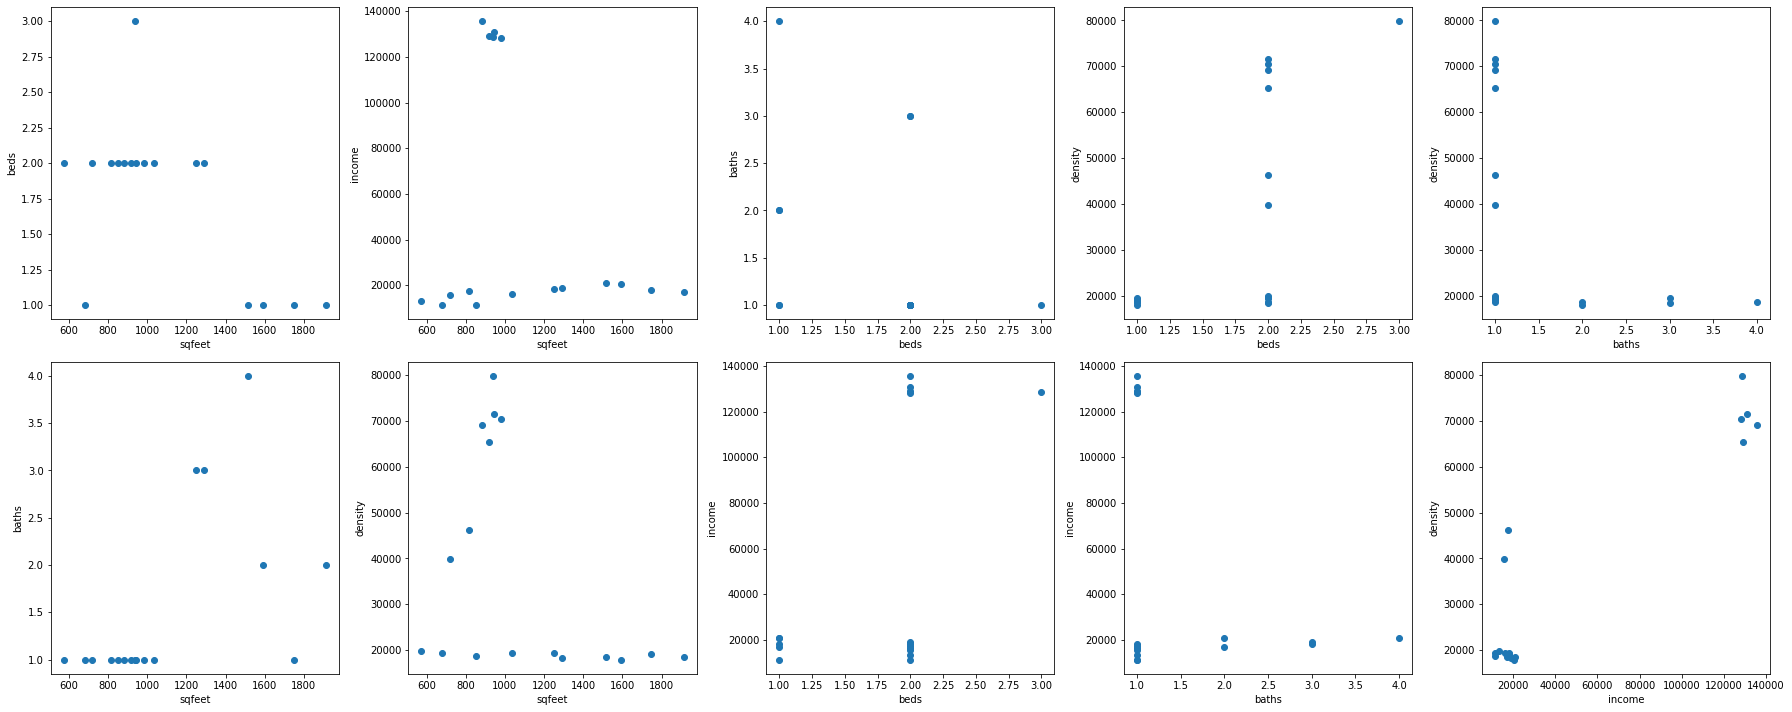

In [44]:
visualization.plot_input_distributions(optimized_data)

In [45]:
optimized_data.to_csv('./outputs/rent_sale/smpso.csv')